# Losses Over Time

In [2]:
import autorootcwd
import json
import matplotlib.pyplot as plt
import os
import torch

In [3]:

from src.utils import get_cqt, get_filenames

DIR = './data/processed/cache/512/cqts/'
filenames = get_filenames()
filename = filenames[0]

cqt = torch.load(DIR + filename + '.pt')
print(cqt.shape)

torch.Size([18580, 216])


/var/folders/wv/rkgyh65d1jx0nzbn07gn8f380000gn/T/ipykernel_28617/2306984661.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cqt = torch.load(DIR + filename + '.pt')


In [4]:
cqt = get_cqt(filename, hop_length=4096, n_bins=6*36, bins_per_octave=36, sr=44100)

cqt.shape

torch.Size([2323, 216])

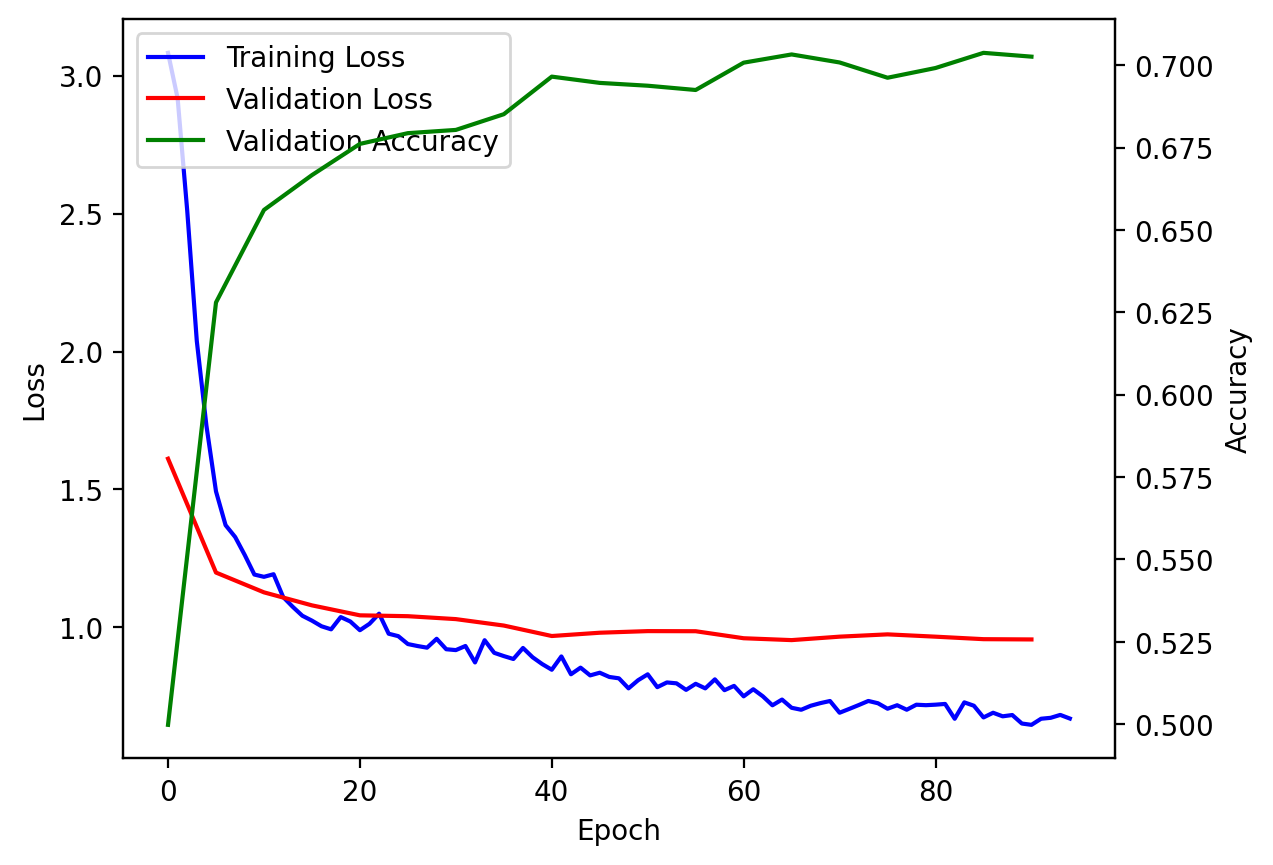

In [7]:
DIR = './results_archive/small_vs_large_vocab'
exp = f'small_vocab_defaults'
training_history = json.load(open(f'{DIR}/{exp}/training_history.json'))
train_losses = training_history['train_losses']
val_losses = training_history['val_losses']
val_accuracies = training_history['val_accuracies']
# Plot all 3, with acc having its own y-axis
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(train_losses, label='Training Loss', color='blue')
# Multiply validations by 5 as they were only recorded every 5 epochs
ax1.plot([5 * i for i in range(len(val_losses))], val_losses, label='Validation Loss', color='red')
ax2.plot([5 * i for i in range(len(val_accuracies))], val_accuracies, label='Validation Accuracy', color='green')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax2.set_ylabel('Accuracy')
# Collect legend handles and labels
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Create a single legend
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left')
# plt.title(f'Small Vocabulary Training History')
plt.savefig(f'./report/figures/small_vocab_training_plot.png', dpi=100, bbox_inches='tight')

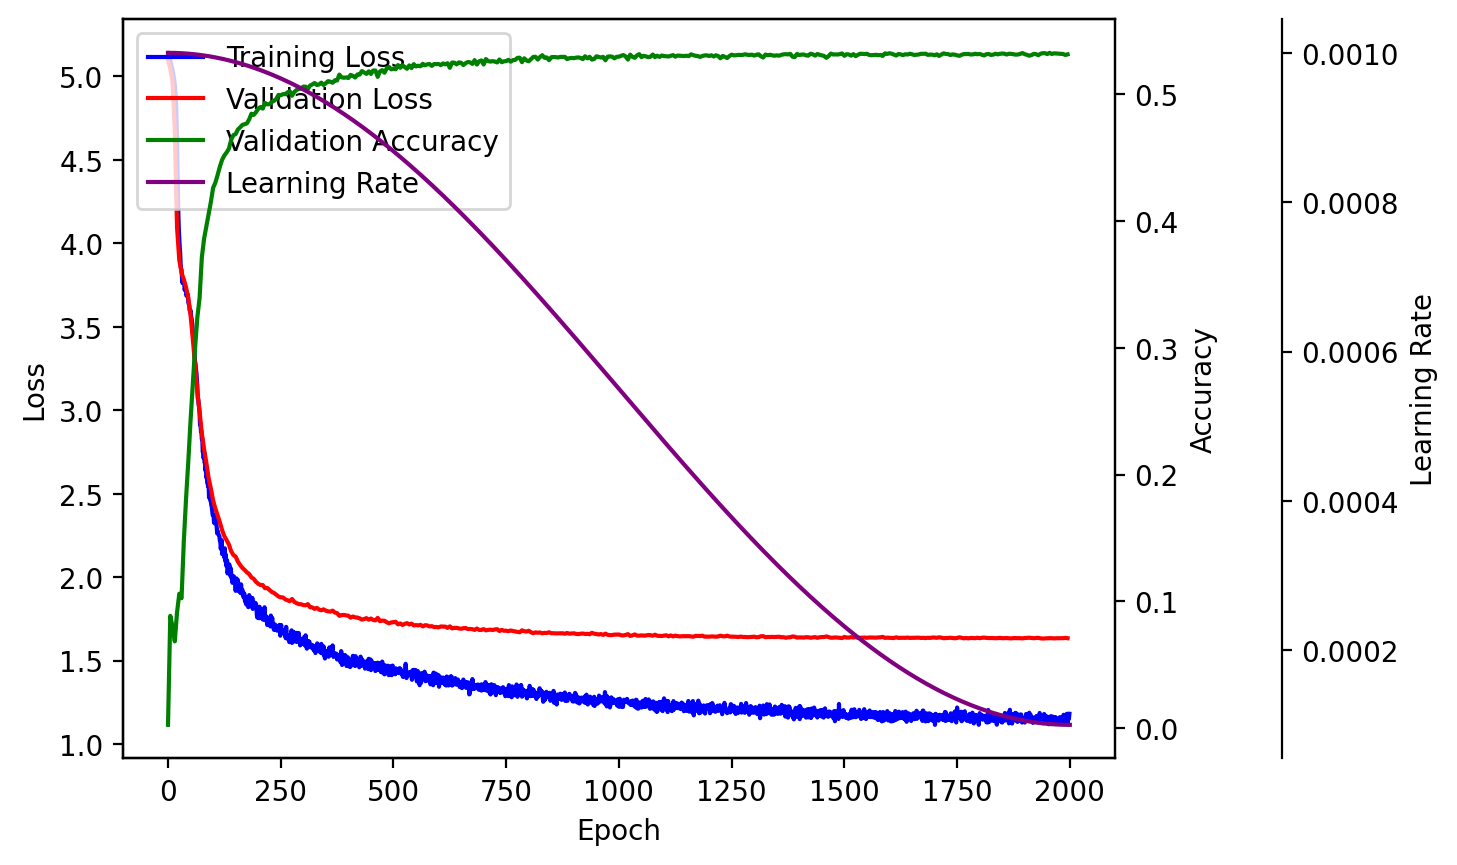

In [9]:
DIR = './results_archive/'
exp = f'long_sgd'
training_history = json.load(open(f'{DIR}/{exp}/training_history.json'))
train_losses = training_history['train_losses']
val_losses = training_history['val_losses']
val_accuracies = training_history['val_accuracies']
learning_rates = training_history['learning_rates']
# Plot all 3, with acc having its own y-axis
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(train_losses, label='Training Loss', color='blue')
# Multiply validations by 5 as they were only recorded every 5 epochs
ax1.plot([5 * i for i in range(len(val_losses))], val_losses, label='Validation Loss', color='red')
ax2.plot([5 * i for i in range(len(val_accuracies))], val_accuracies, label='Validation Accuracy', color='green')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax2.set_ylabel('Accuracy')

ax3 = ax1.twinx()
ax3.plot([5 * i for i in range(len(learning_rates))], learning_rates, label='Learning Rate', color='purple')
ax3.set_ylabel('Learning Rate')
ax3.spines['right'].set_position(('outward', 60))

# Collect legend handles and labels
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()

# Create a single legend
ax1.legend(handles1 + handles2 + handles3, labels1 + labels2 + labels3, loc='upper left')
# plt.title(f'Small Vocabulary Training History')
plt.savefig(f'./report/figures/long_sgd_training_plot.png', dpi=100, bbox_inches='tight')

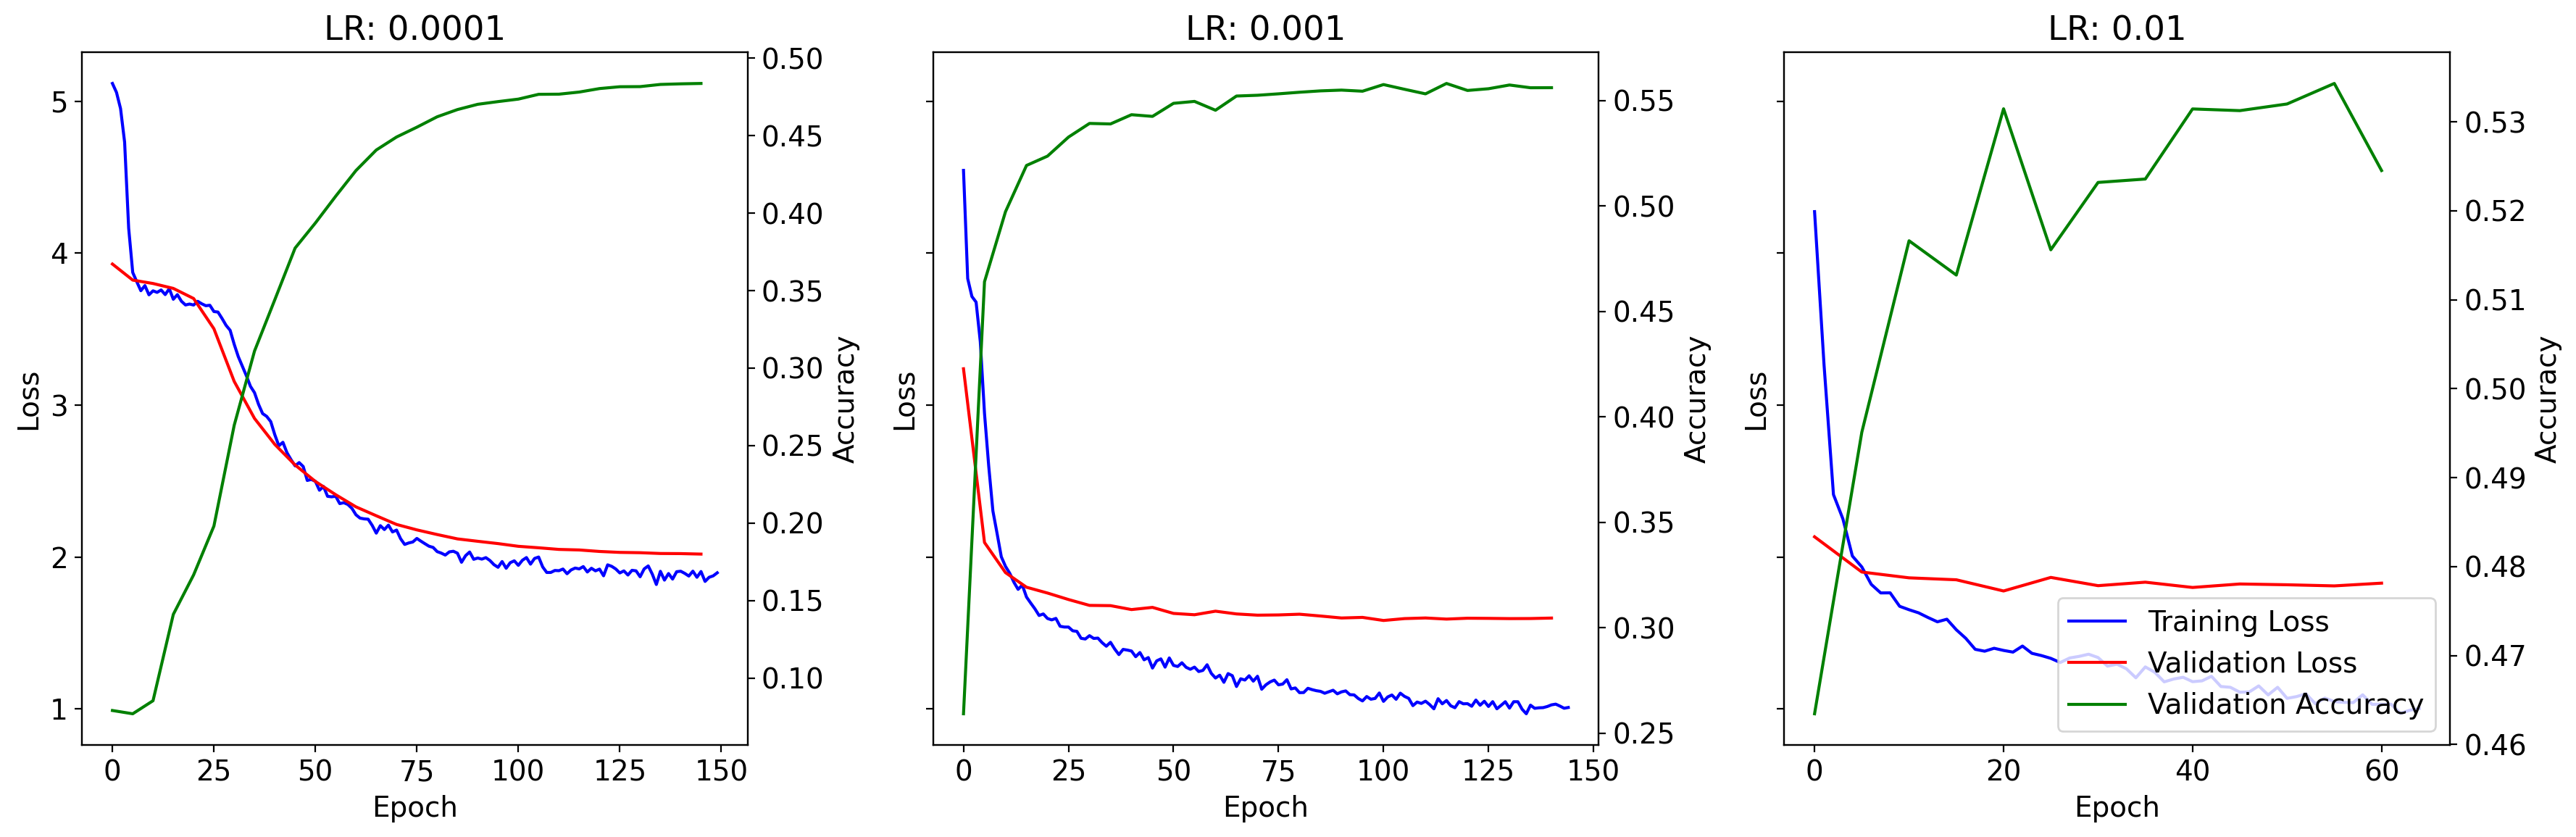

In [21]:
# Loop over directory of experiments
plt.rcParams.update({'font.size': 14})
DIR = './results_archive/experiments_lr_search/'
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
learning_rates_to_plot = [0.0001, 0.001, 0.01]
for i, lr in enumerate(learning_rates_to_plot):
    exp = f'lr-search_cosine_{lr}'
    training_history = json.load(open(f'{DIR}/{exp}/training_history.json'))
    train_losses = training_history['train_losses']
    val_losses = training_history['val_losses']
    val_accuracies = training_history['val_accuracies']
    ax1 = axs[i]
    ax2 = ax1.twinx()
    ax1.plot(train_losses, label='Training Loss', color='blue')
    # Multiply validations by 5 as they were only recorded every 5 epochs
    ax1.plot([5 * j for j in range(len(val_losses))], val_losses, label='Validation Loss', color='red')
    ax2.plot([5 * j for j in range(len(val_accuracies))], val_accuracies, label='Validation Accuracy', color='green')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax2.set_ylabel('Accuracy')
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    if i == 2:
        ax1.legend(handles1 + handles2, labels1 + labels2, loc='lower right')
    ax1.set_title(f'LR: {lr}')

plt.tight_layout()
plt.savefig(f'./report/figures/lr_search_cosine.png', dpi=100, bbox_inches='tight')
plt.show()

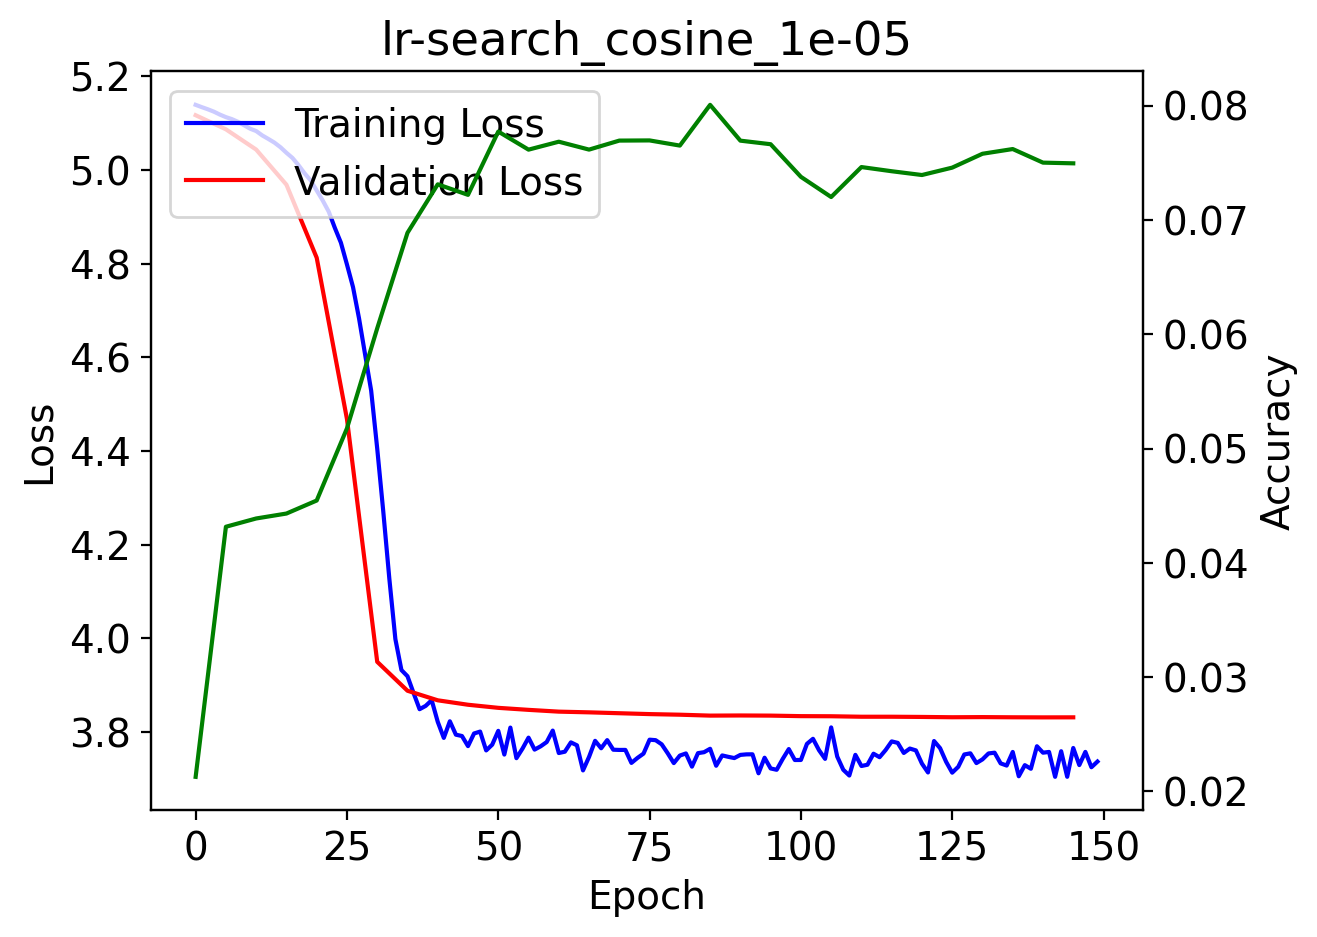

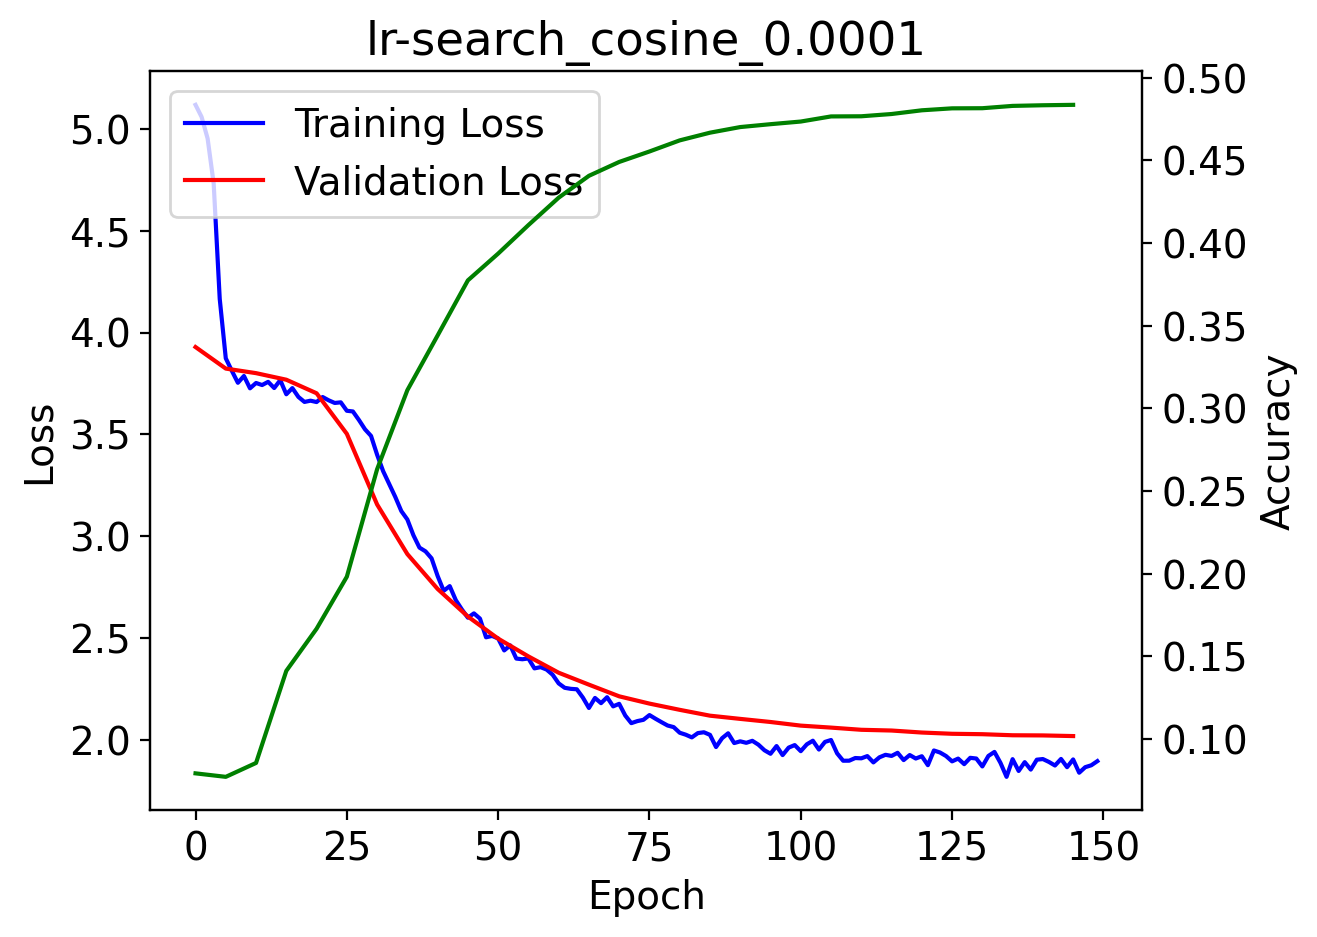

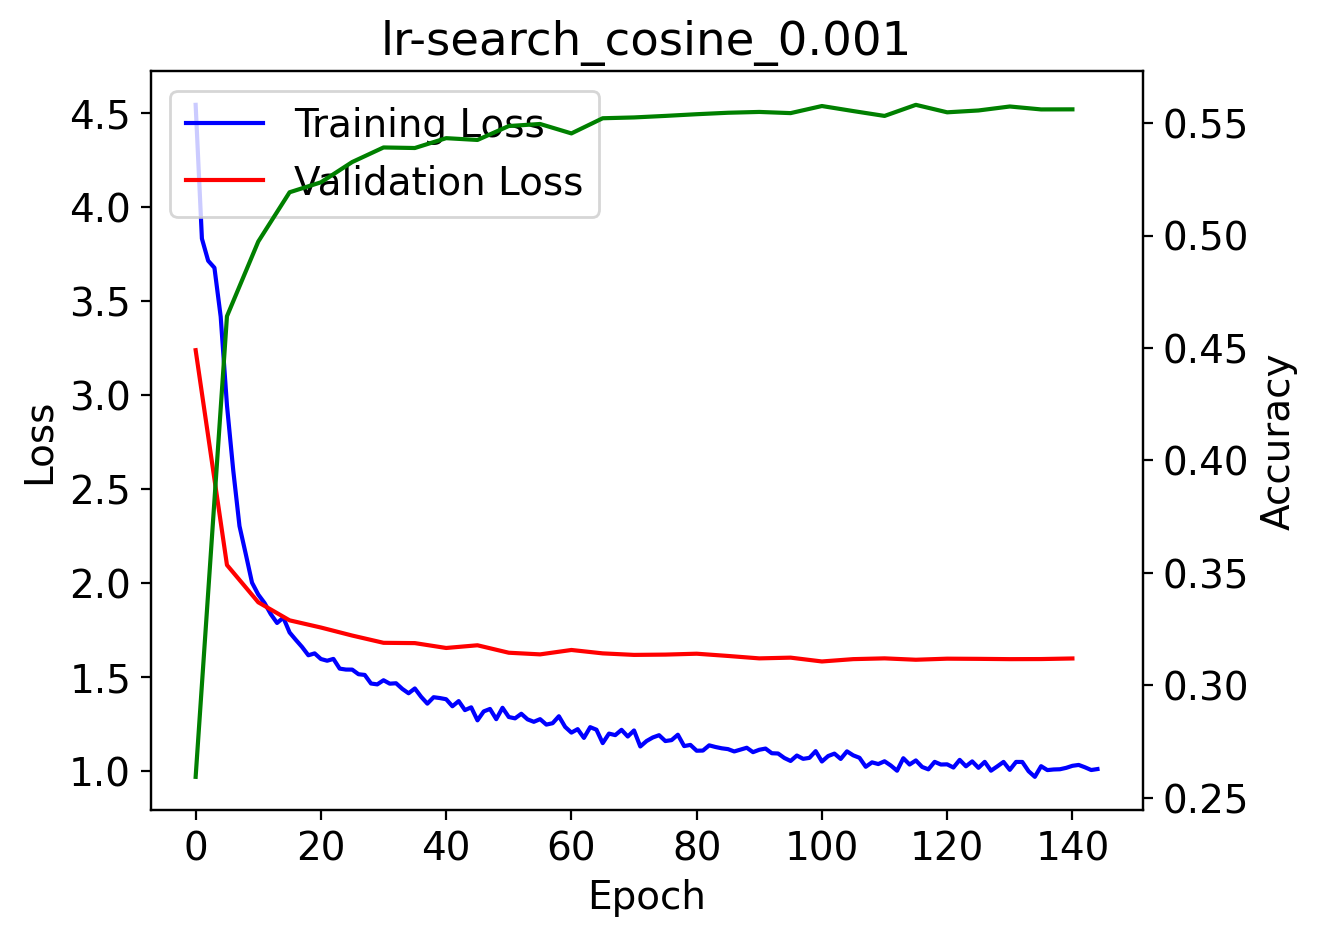

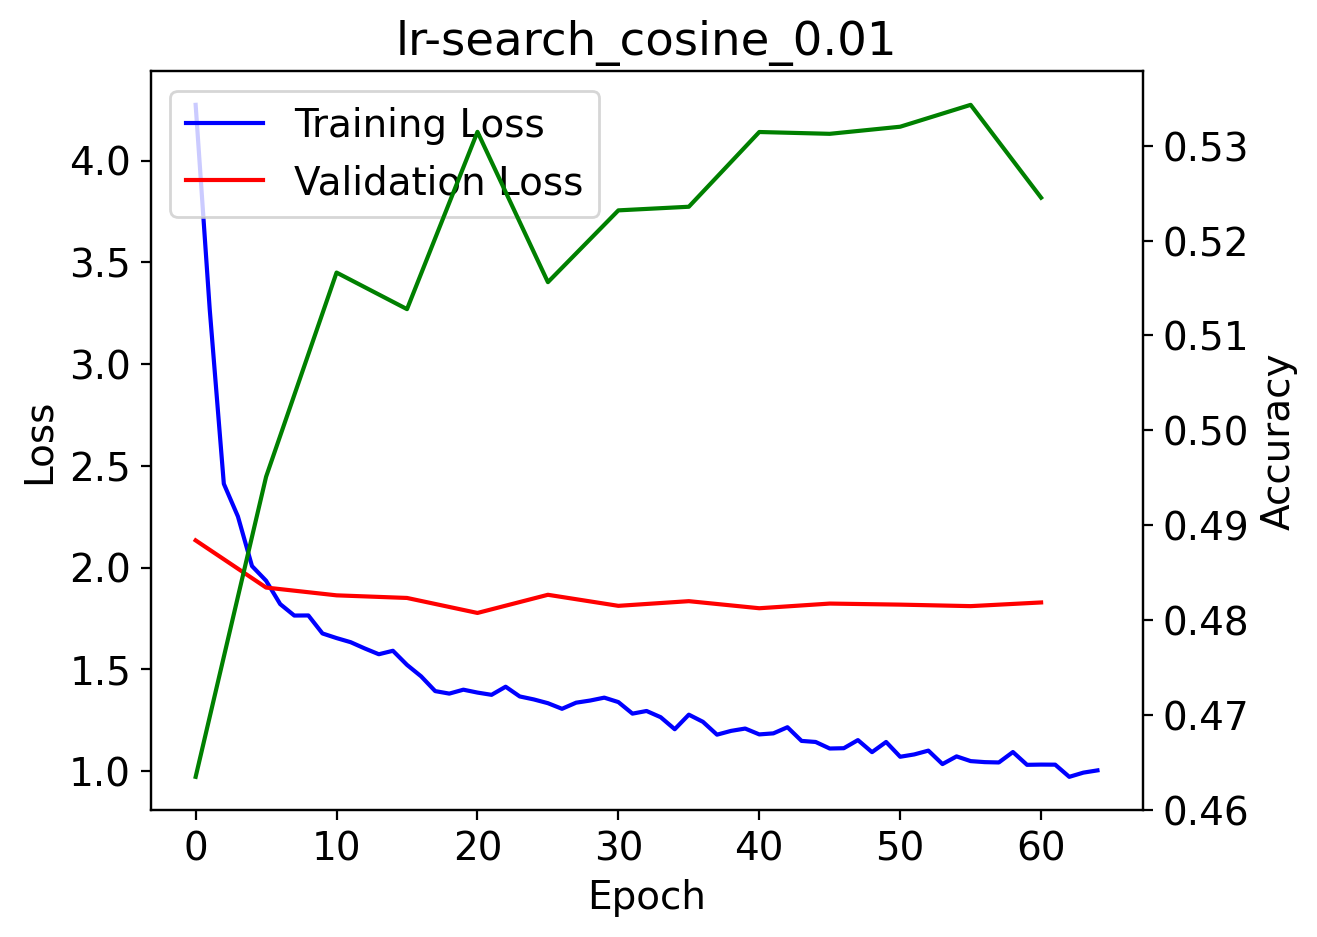

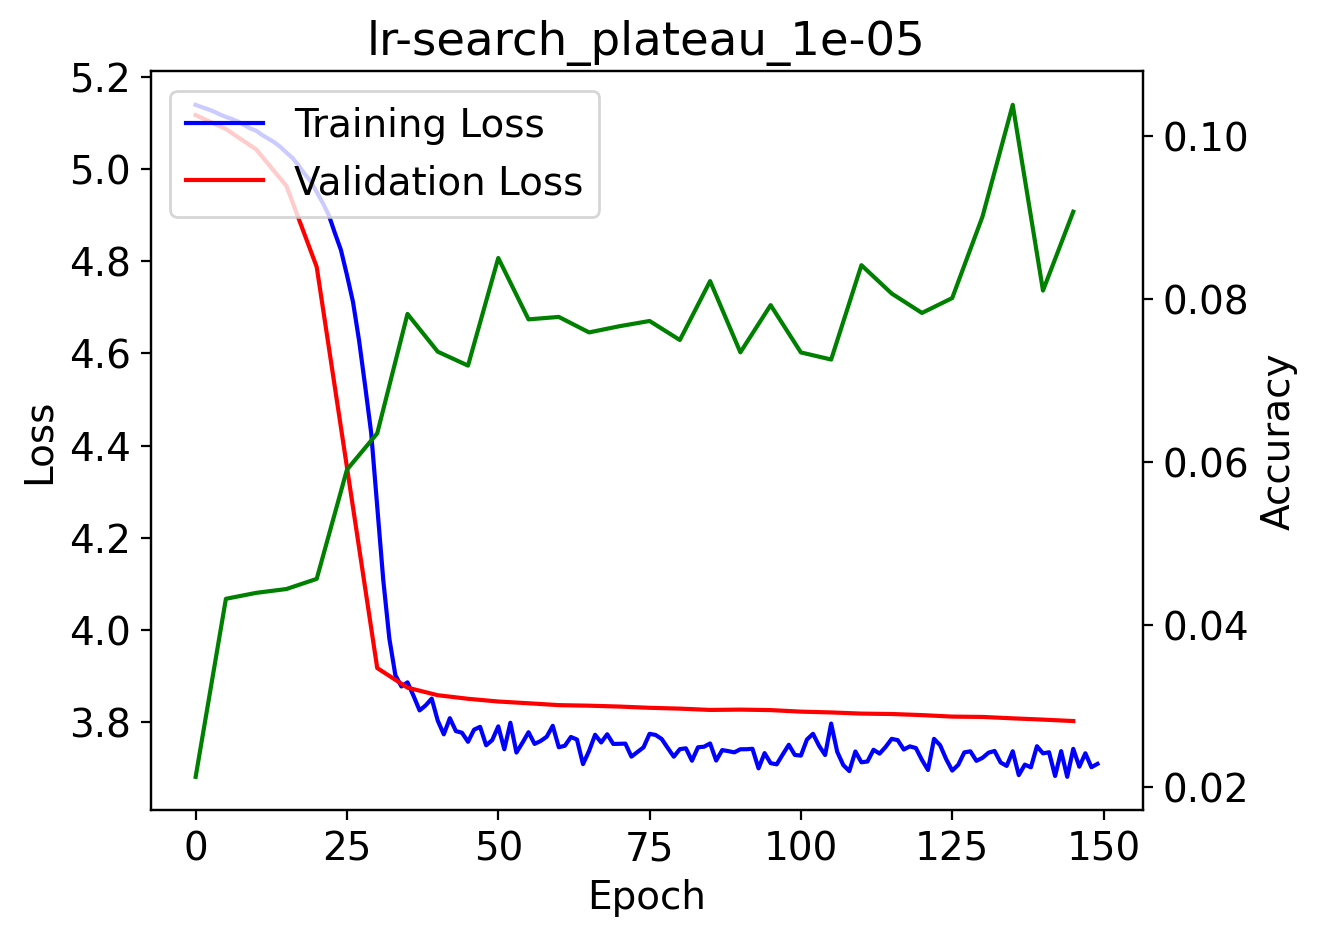

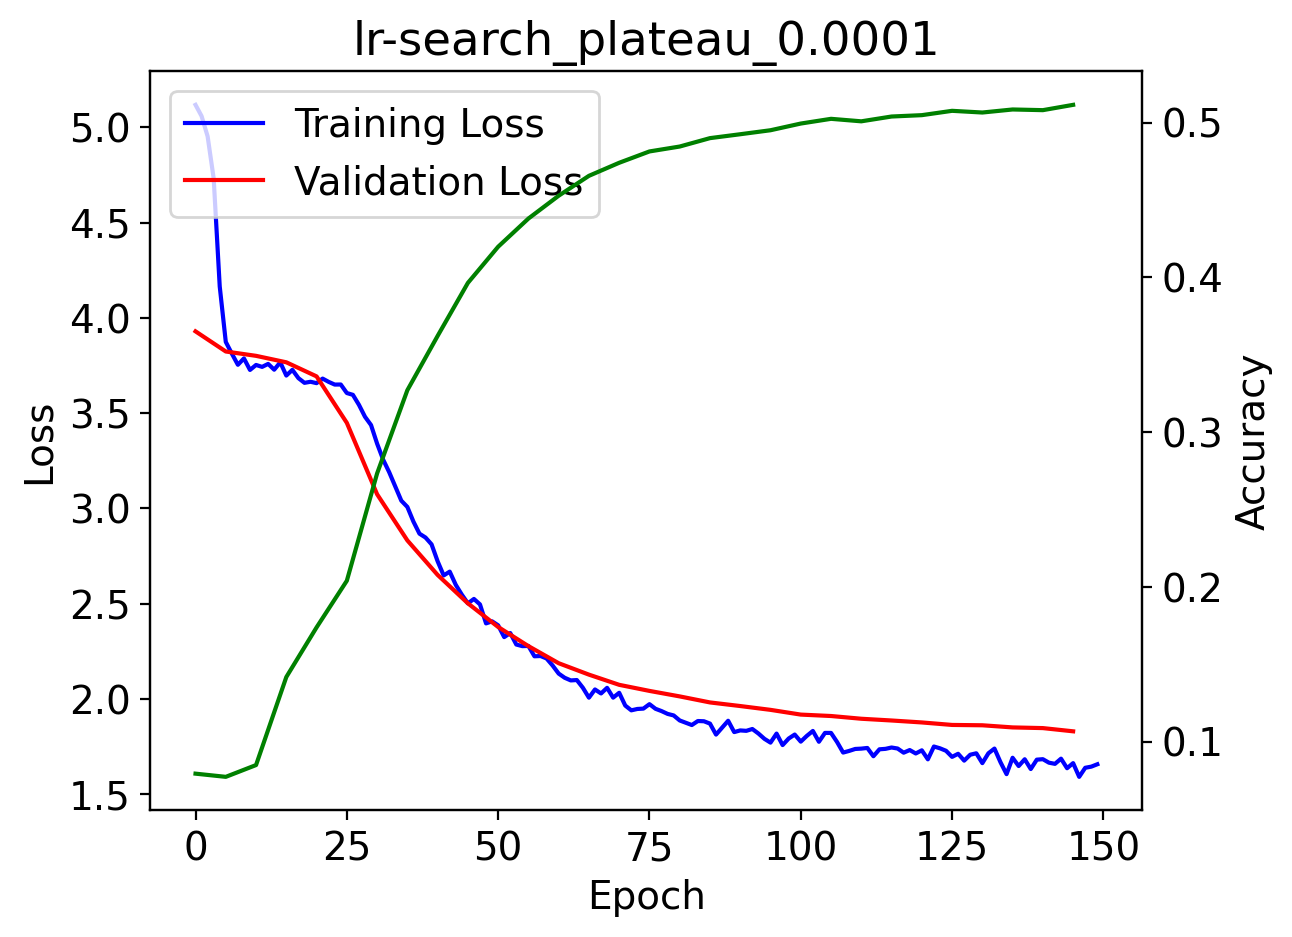

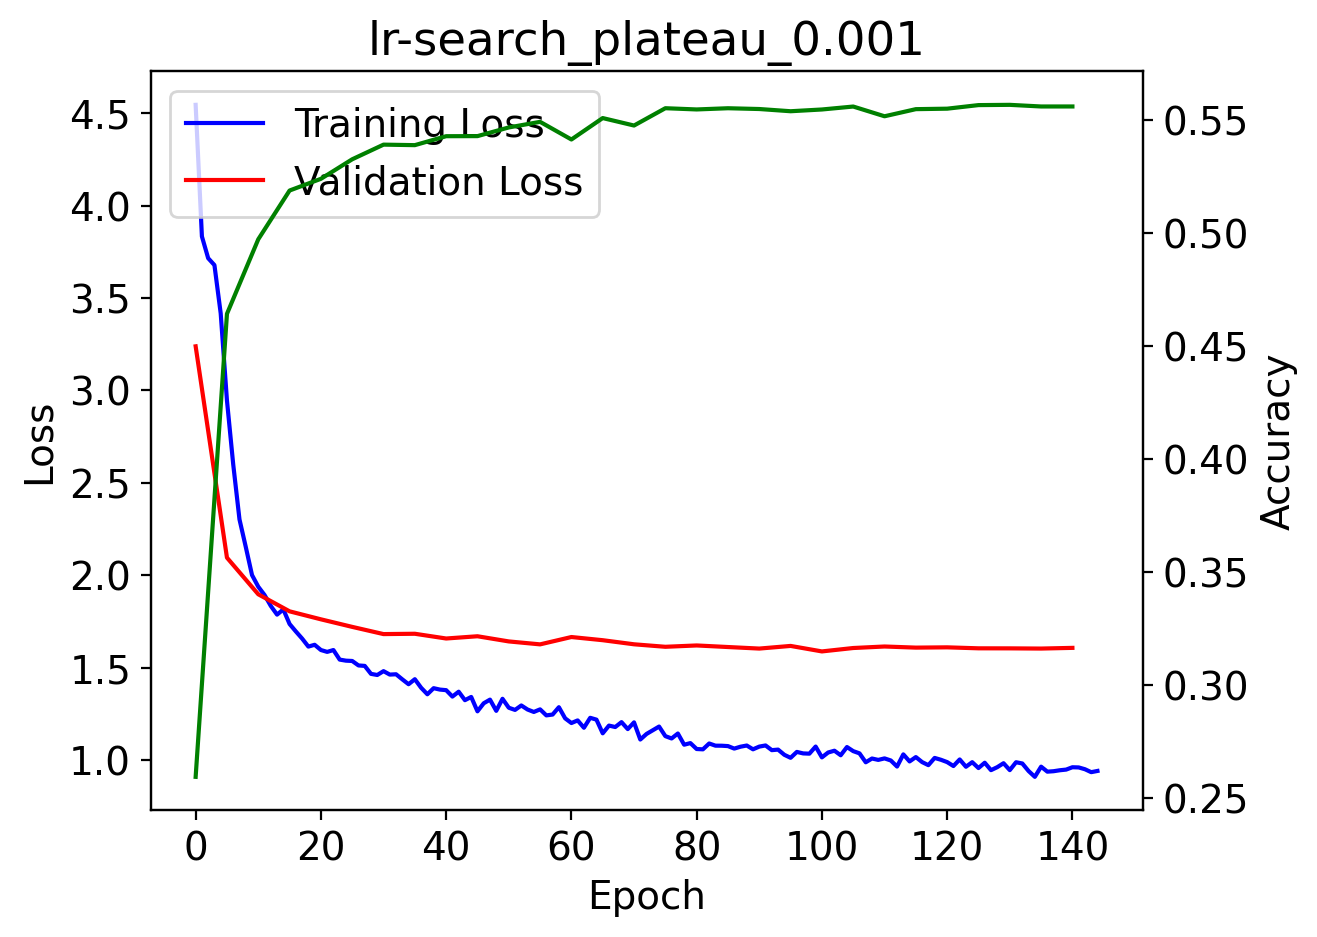

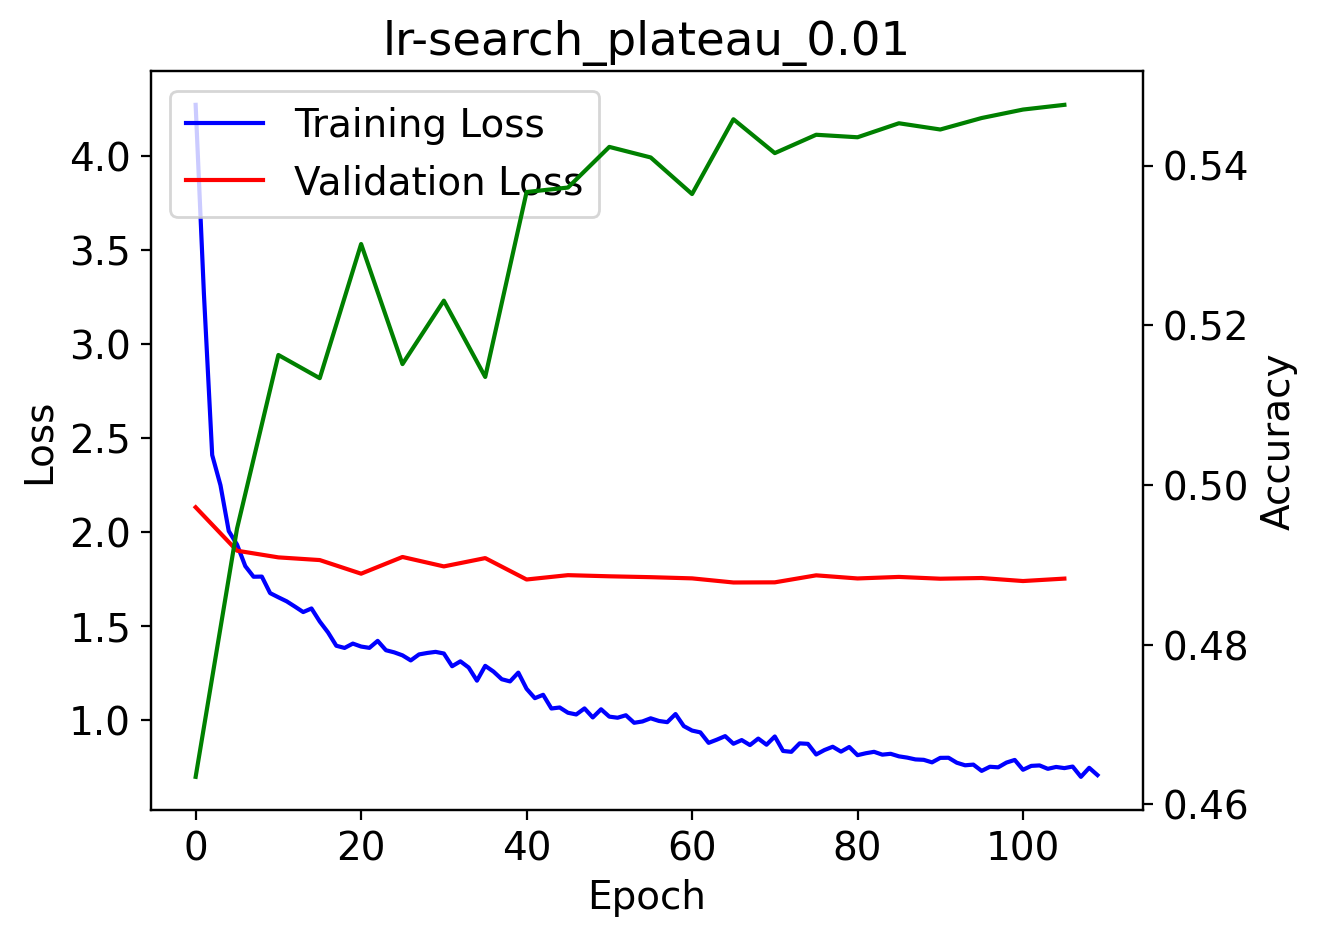

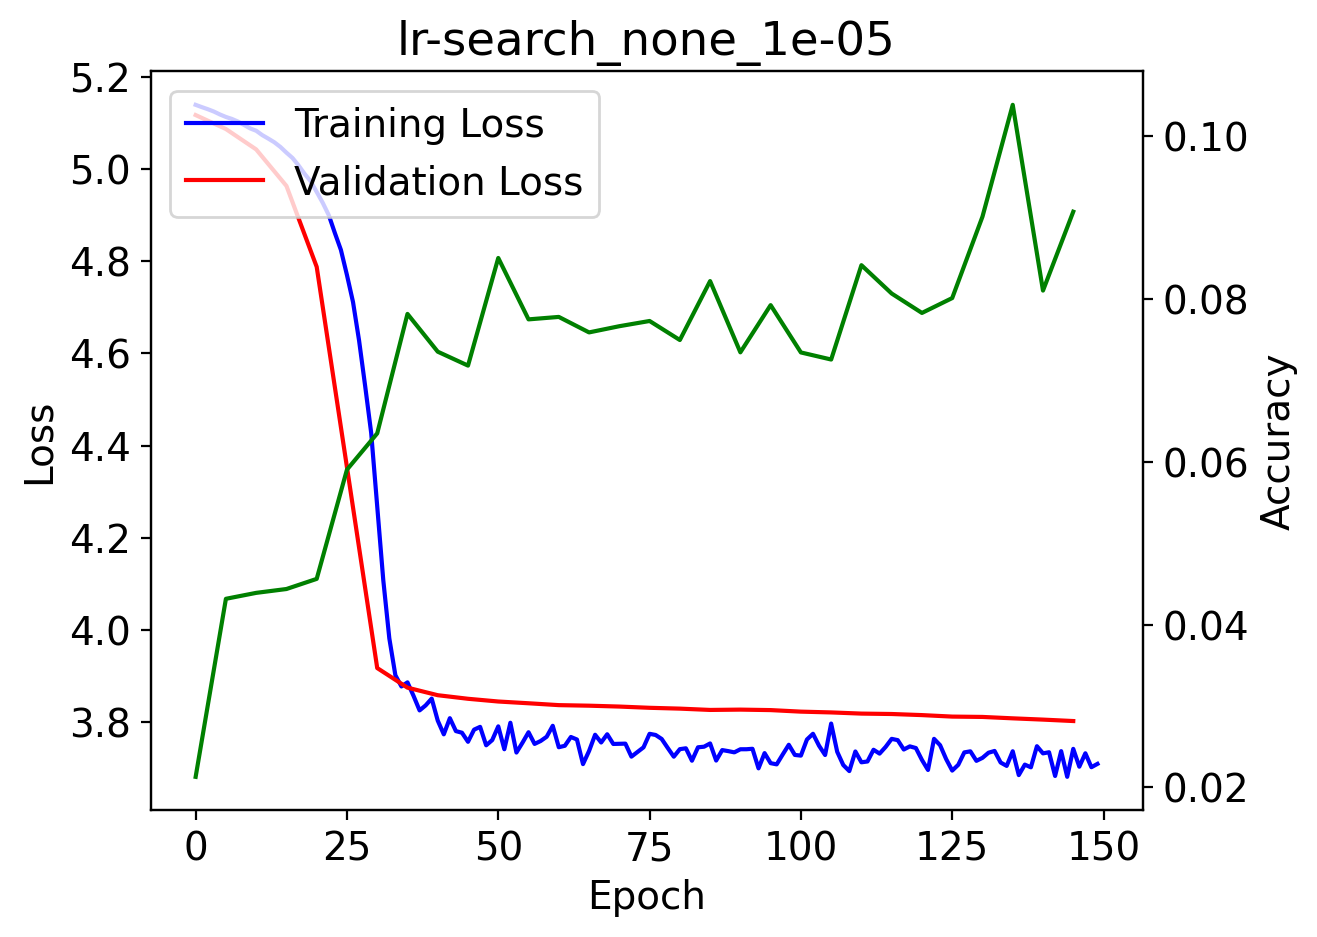

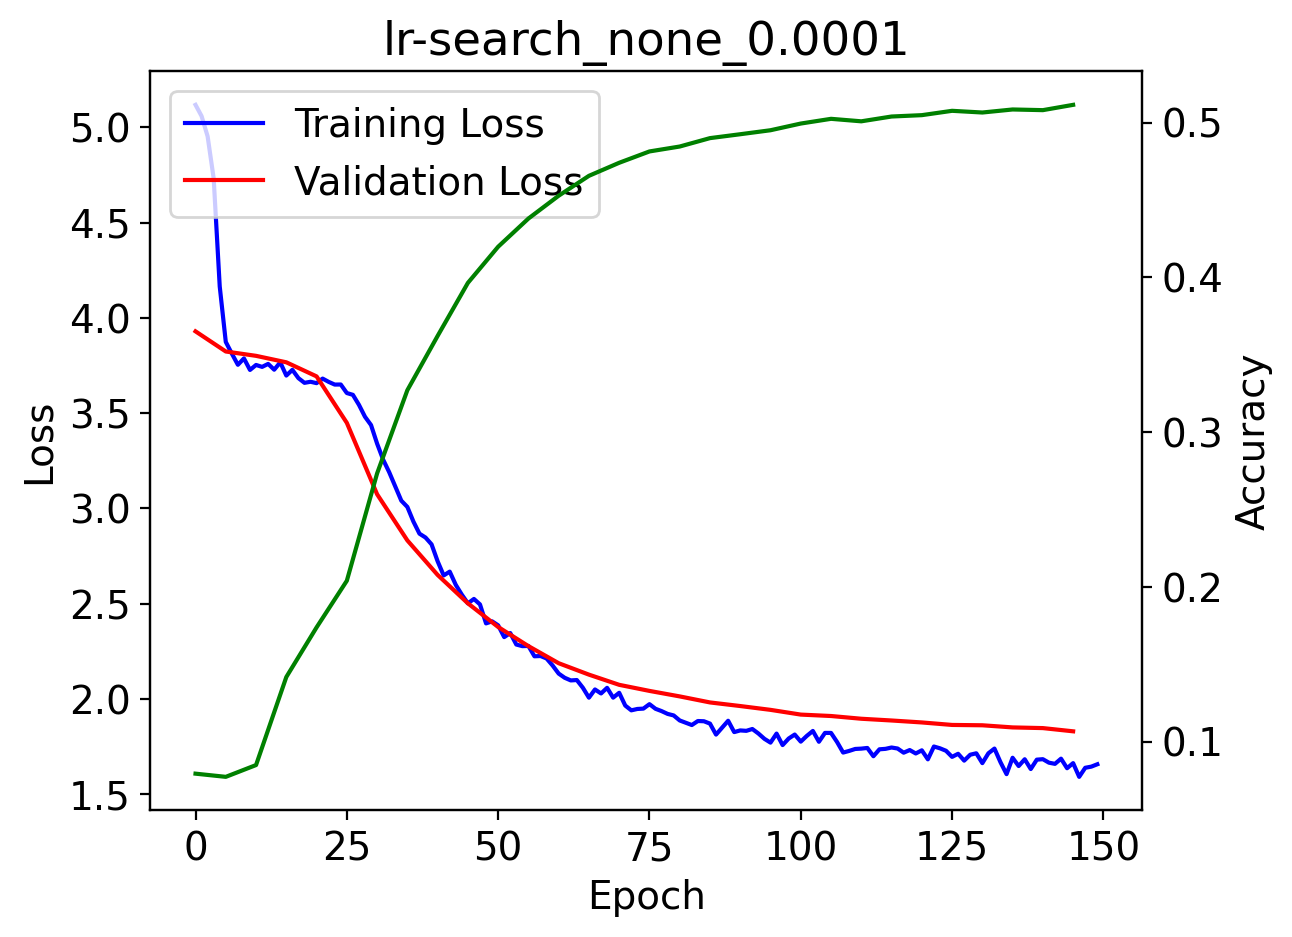

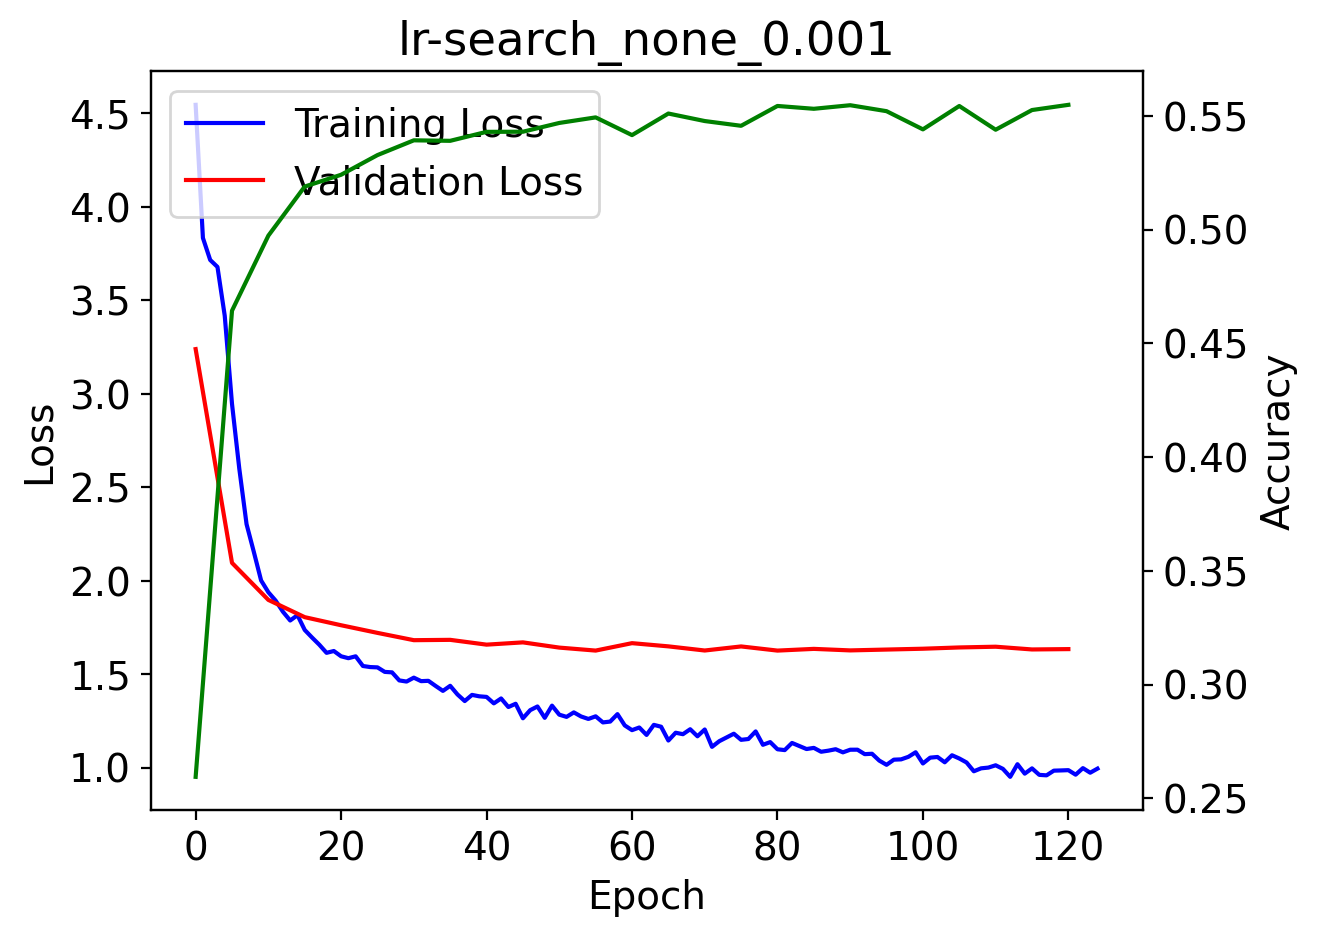

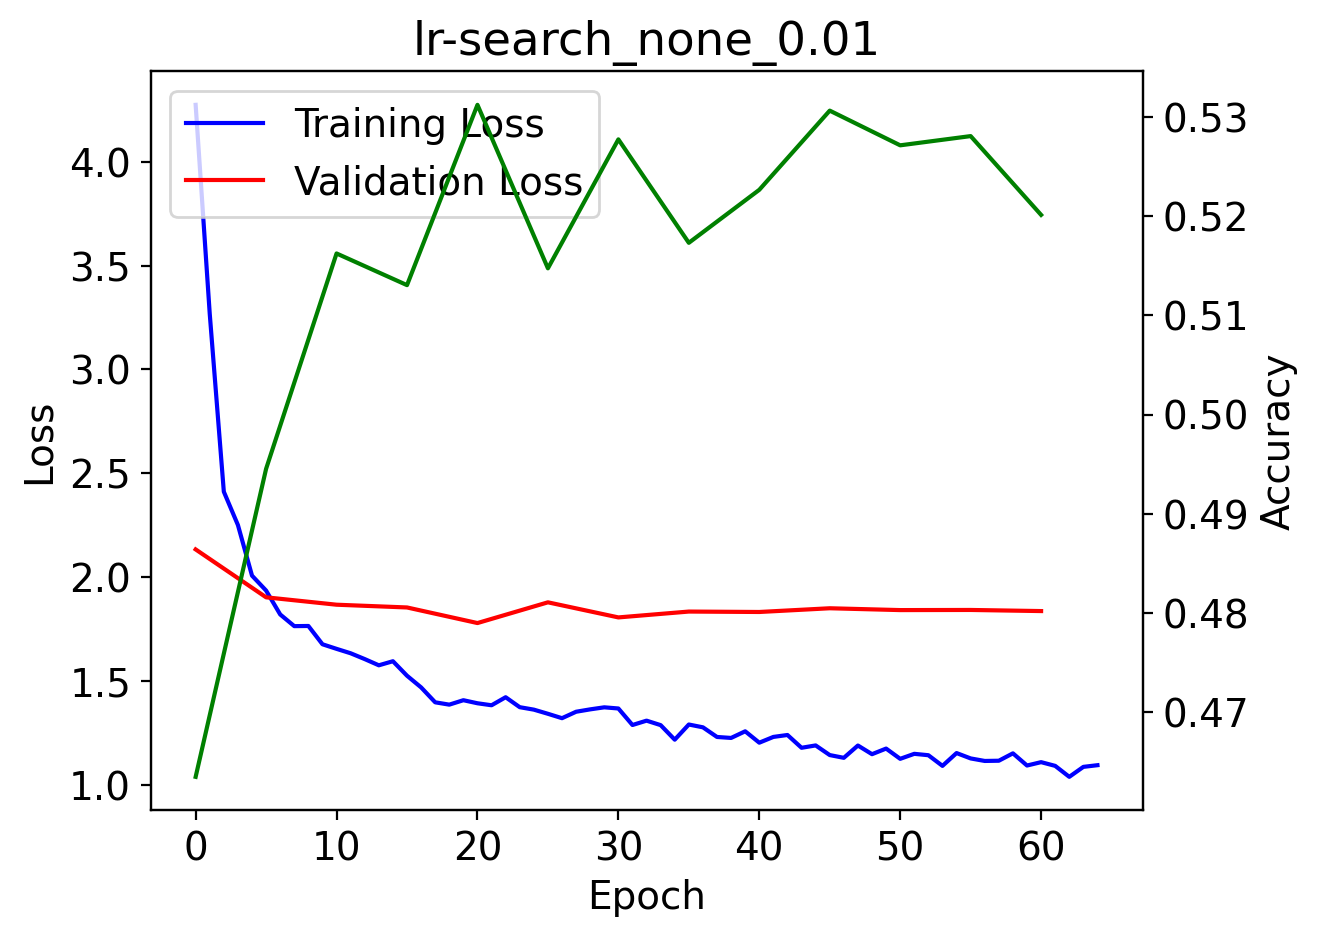

In [18]:
# Loop over directory of experiments
DIR = './results_archive/experiments_lr_search/'
experiments = os.listdir(DIR)
for lr_scheduler in ['cosine', 'plateau', 'none']:
    for lr in [1e-5, 0.0001, 0.001, 0.01]:
        exp = f'lr-search_{lr_scheduler}_{lr}'
        training_history = json.load(open(f'{DIR}/{exp}/training_history.json'))
        train_losses = training_history['train_losses']
        val_losses = training_history['val_losses']
        val_accuracies = training_history['val_accuracies']
        # Plot all 3, with acc having its own y-axis
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(train_losses, label='Training Loss', color='blue')
        # Multiply validations by 5 as they were only recorded every 5 epochs
        ax1.plot([5 * i for i in range(len(val_losses))], val_losses, label='Validation Loss', color='red')
        ax2.plot([5 * i for i in range(len(val_accuracies))], val_accuracies, label='Validation Accuracy', color='green')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax2.set_ylabel('Accuracy')
        ax1.legend(loc='upper left')
        plt.title(f'{exp}')